In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sqlite3
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

%matplotlib inline
plt.style.use('ggplot')

np.random.seed(2)

In [2]:
def select(query):
    
    conn = sqlite3.connect(r'C:\Users\Pablo\Desktop\pablo\academics\springboard data science\Capstone Project 2\Loan-Risk-Analysis\data\lending-club-loan-data\database2.sqlite')
    cursor = conn.cursor()
    temp_df = pd.DataFrame(cursor.execute(query).fetchall())
    temp_df.columns = list(map(lambda x: x[0], cursor.description))
    conn.close()
    
    return temp_df.copy()

In [3]:
#features_train = select('SELECT * FROM final_cat_features_train').drop(['0','1','2','3','4','5','6','7','8','9','10','11'],axis=1)
#targets_train = select('SELECT * FROM final_targets_train')

#features_test = select('SELECT * FROM final_cat_features_test').drop(['0','1','2','3','4','5','6','7','8','9','10','11'],axis=1)
#targets_test = select('SELECT * FROM final_targets_test')

#features_train = pd.concat([features_train,features_test[:40000]]).copy().reset_index(drop=True)
#targets_train = pd.concat([targets_train,targets_test[:40000]]).copy().reset_index(drop=True)

#features_test = features_test[40000:].copy()
#targets_test = targets_test[40000:].copy()

data = pd.read_csv(r'C:\Users\Pablo\Desktop\pablo\academics\springboard data science\machine learning\logistic_regression\data\01_heights_weights_genders.csv')
data.Gender = data.Gender.apply(lambda x: x == 'Male').astype(int)
data = shuffle(data).reset_index(drop=True)
data.Height = (data.Height - data.Height.mean())/data.Height.std()
data.Weight = (data.Weight - data.Weight.mean())/data.Weight.std()

features_train = data[:9500][['Height','Weight']]
targets_train = data[:9500]['Gender']

features_test = data[9500:][['Height','Weight']]
targets_test = data[9500:]['Gender']

In [4]:
model = tf.keras.Sequential()

layer_hidden_units = [5,3,3,1]

for i,hu in enumerate(layer_hidden_units):
    if i == 0: # need to specify input dimensions for the first layer
        model.add(tf.keras.layers.Dense(hu,activation='relu',input_dim=2,
                                        kernel_initializer=tf.keras.initializers.TruncatedNormal))
        continue
    if i == len(layer_hidden_units)-1: # different activation for the output layer
        model.add(tf.keras.layers.Dense(hu,activation='sigmoid'))
        continue
        
    model.add(tf.keras.layers.Dense(hu,activation='relu',kernel_initializer=tf.keras.initializers.TruncatedNormal))
    
    
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [5]:
# since batch_size == len(features_train), this is standard GD. thus epochs == iterations

# model.train_on_batch allows us to run iterations one at a time (better approach for mini batches)

train_acc = []
test_acc = []
iters = 200

for i in range(iters):
    model.fit(features_train.values,targets_train,epochs=1,batch_size=9500,verbose=0)
    train_acc.append(model.evaluate(features_train.values,targets_train.values,verbose=0)[1])
    test_acc.append(model.evaluate(features_test.values,targets_test.values,verbose=0)[1])

In [6]:
model.predict(features_test.values)[:3]

array([[ 0.98945123],
       [ 0.40987557],
       [ 0.40945524]], dtype=float32)

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [8]:
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())

[None, 5]
[None, 3]
[None, 3]
[None, 1]


(0, 1.1)

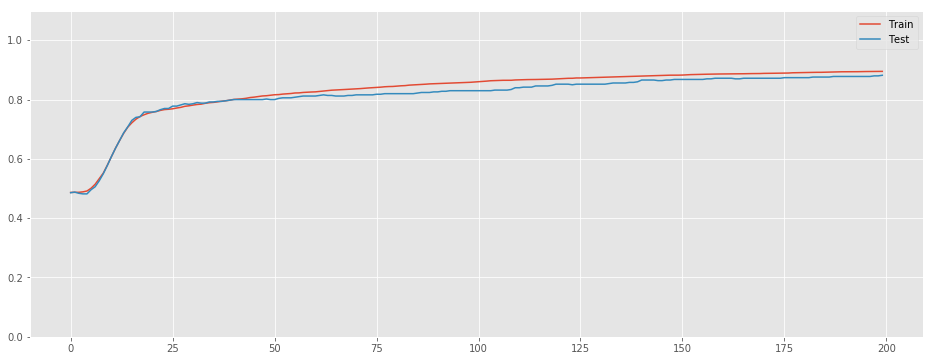

In [9]:
fig, ax = plt.subplots(1,1,figsize=(16,6))

ax.plot(list(range(iters)),train_acc)
ax.plot(list(range(iters)),test_acc)
ax.legend(['Train','Test'])
ax.set_ylim([0,1.1])

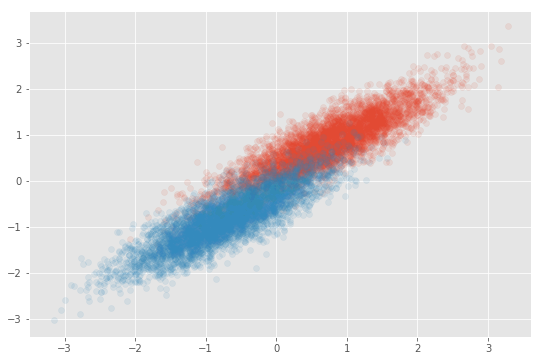

In [10]:
fig, ax = plt.subplots(1,1,figsize=(9,6))

ax.scatter(data[data.Gender==1].Height,data[data.Gender==1].Weight,alpha=0.1)
ax.scatter(data[data.Gender==0].Height,data[data.Gender==0].Weight,alpha=0.1)